# Data Visualization with Haberman Dataset:

In [ ]:

Reference : https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1
            https://www.kaggle.com/premvardhan/exploratory-data-analysis-haberman-s-survival
            https://www.kaggle.com/vj1998/haberman-s-survival-exploratory-data-analysis
                
        And Our EDA iPython Notebook also i.e "Exploratory Data Analysis(for the whole chapter)."
        
1.Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

2.Past Usage:

    Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
    Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
    Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
    Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

3.Number of Instances: 306

4.Number of Attributes: 4 (including the class attribute)

5.Attribute Information / Features Information :

    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

6.Missing Attribute Values: None


## Objective :

    To classify/predict a patient survival who had undergone surgery for breast cancer.

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


'''downlaod iris.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1'''

#Load haberman.csv into a pandas dataFrame.

hbm = pd.read_csv("haberman.csv")


In [76]:
# (Q) how many data-points and features?
# Number of rows(data-points) and columns(features).

print (hbm.shape)

(305, 4)


In [77]:
# To know number of features/columns.
print (hbm.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [78]:
# top n (5 by default) rows of a data frame or series.
hbm.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [124]:
# To rename the column name for better understanding
# Both of the ways we can rename the columns name

hbm.columns = ["age", "operation_year", "axillary_lymph_node", "survival_status"]

#or

hbm = hbm.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "axillary_lymph_node", "1.1" : "survival_status"})

# It gives you the top 5 rows(data-points).

hbm.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [80]:
# To know about data summary

hbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                    305 non-null int64
operation_year         305 non-null int64
axillary_lymph_node    305 non-null int64
survival_status        305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### statistical summary of data which is very important 

In [81]:
# statistical summary of data which is very important

hbm.describe()

,age,operation_year,axillary_lymph_node,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [82]:
# Number of data-points for each class.
# As it is not balanced dataset, it is imbalanced dataset because the number of data-points for both of the class are significantly different.
# we will see how to handle imbalanced data later

hbm.survival_status.value_counts()

1    224
2     81
Name: survival_status, dtype: int64

# Scatter Plots

## 1-D Scatter Plot 

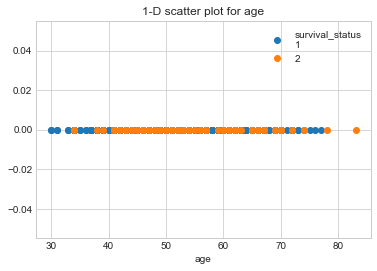

In [123]:
# 1-d scatter plot
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.


one = hbm.loc[hbm["survival_status"] == 1]
two = hbm.loc[hbm["survival_status"] == 2]
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label = "survival_status\n" "1")
plt.plot(two["age"], np.zeros_like(two["age"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()


## observations

After looking at this plot we can easily count number of points that are there in age range who survived or not.
Many person died whose age was between 41-70.

## 2-D Scatter Plot

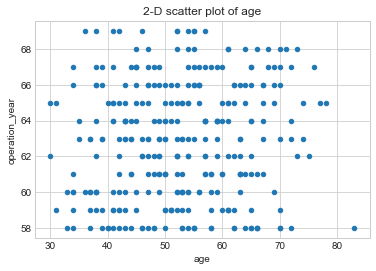

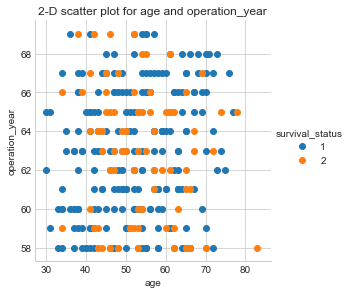

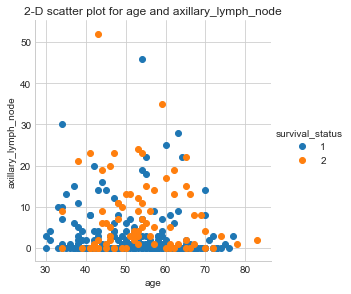

In [141]:
# 2-d scatter plot

hbm.plot(kind = "scatter", x = "age", y = "operation_year")
plt.title("2-D scatter plot of age")
plt.show()


# 2d scatter plot with color coding for each class

sns.set_style("whitegrid")
sns.FacetGrid(hbm, hue = "survival_status", size = 4).map(plt.scatter, "age", "operation_year").add_legend()
plt.title("2-D scatter plot for age and operation_year")
plt.show()


# 2d scatter plot 

sns.set_style("whitegrid")
sns.FacetGrid(hbm, hue = "survival_status", size = 4).map(plt.scatter, "age", "axillary_lymph_node").add_legend()
plt.title("2-D scatter plot for age and axillary_lymph_node")
plt.show()


## observations

In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable
0-5 axillary_lymph_node person survived and died as well but the died ratio is less than survive ratio.

## 3D Scatter plot: 
    
    Getting Error, Not able to Plot Data in 3D,I Use Following Code 
    
    Source of Code: 
        https://plot.ly/pandas/3d-scatter-plots/

In [ ]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
#hbm = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
hbm = pd.read_csv("haberman.csv")

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(hbm['survival_status'].unique())):
    name = hbm['survival_status'].unique()[i]
    color = colors[i]
    x = hbm[ hbm['survival_status'] == name ]['age']
    y = hbm[ hbm['survival_status'] == name ]['operation_year']
    z = hbm[ hbm['survival_status'] == name ]['axillary_lymph_node']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Haberman dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-iris', validate=False)
#url = py.plot(fig, filename='haberman', validate=False)

# Pair-plot :

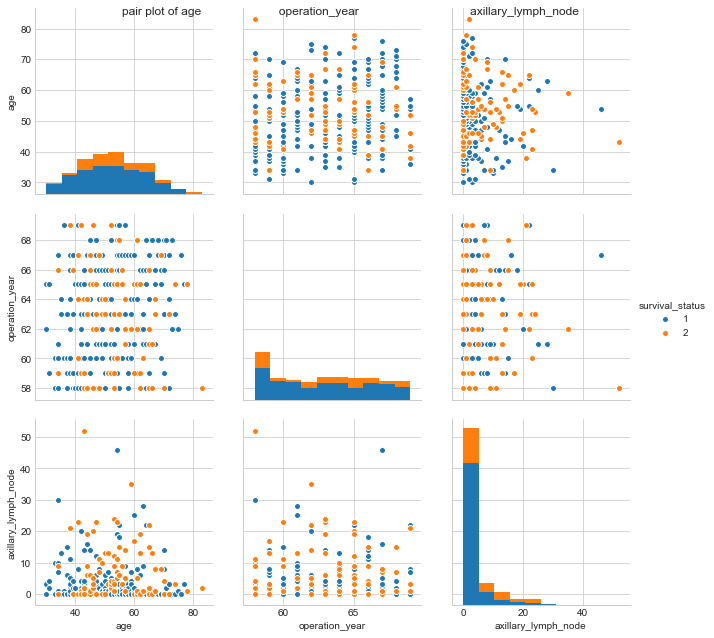

In [142]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.

sns.set_style("whitegrid")
sns.pairplot(hbm, hue = "survival_status", vars = ["age", "operation_year", "axillary_lymph_node"], size = 3)
plt.suptitle("pair plot of age                       operation_year                                 axillary_lymph_node")
plt.show()

# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

## Observation:
    
Here also same overlapping problem like previous,here is also No classification possible.
As we are unable to classify which is the most useful feature because of too much overlapping. 
But, Somehow we can say, In operation_year, 60-65 more person died who has less than 6 axillary_lymph_node.
And hence, this plot is not much informative in this case

# Histogram, PDF, CDF:
    

## PDF(Probability Density Function) : 

C:\Users\Sohail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\Sohail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



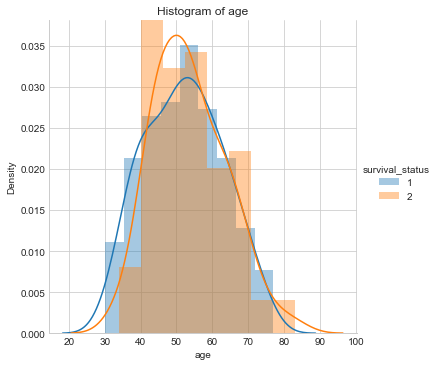

In [115]:
# Here, we are using age feature to generate pdf()
# pdf(smoothed form of histogram)
# pdf basically shows, how many of points lies in some interval
# plotting one dimensionally

sns.FacetGrid(hbm, hue = "survival_status", size = 5).map(sns.distplot, "age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

C:\Users\Sohail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\Sohail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



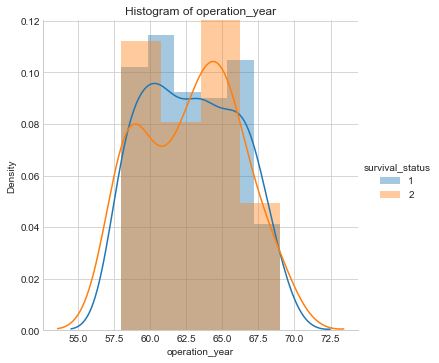

In [116]:

sns.FacetGrid(hbm, hue = "survival_status", size = 5). map(sns.distplot, "operation_year").add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

C:\Users\Sohail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\Sohail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



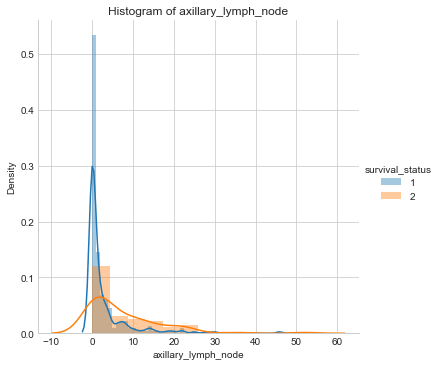

In [117]:
sns.FacetGrid(hbm, hue = "survival_status", size = 5).map(sns.distplot, "axillary_lymph_node").add_legend()
plt.title("Histogram of axillary_lymph_node")
plt.ylabel("Density")
plt.show()

## observations

In all the plots the features are overlapping each other massively. But somehow we can say
probabily 58% people survived who had 0-5 axlillary_lymph_node and 12% died as well.

## CDF(Cummulative Distributed Function) :

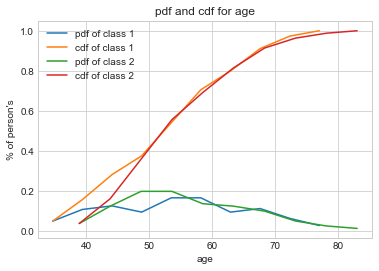

In [119]:
# one = hbm.loc[hbm["survival_status"] == 1]
# two = hbm.loc[hbm["survival_status"] == 2]
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf
# Here, Class 1 means survived
# Class 2 means not survived
one = hbm.loc[hbm["survival_status"] == 1]
two = hbm.loc[hbm["survival_status"] == 2]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()



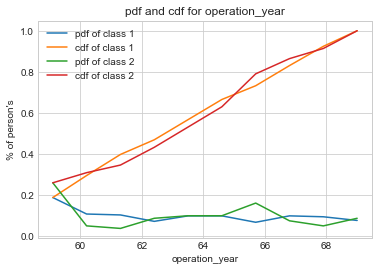

In [120]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(two["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for operation_year")
plt.xlabel("operation_year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();

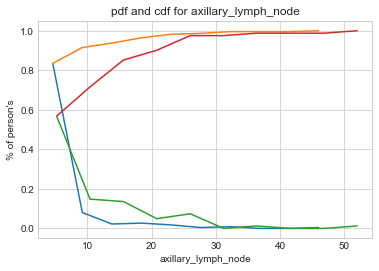

In [121]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for axillary_lymph_node")
plt.xlabel("axillary_lymph_node")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

## Observations

15% of the person's have less than or equal to age 37 who survived.
perosons' who has more than 46 auxillary_lymph_node not survived.

# Mean, Variance and Std-dev :

## Plots of CDF of Age,Operation Year ,axillary_lymph_node,survier_status

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.73442623 0.         0.         0.         0.         0.
 0.         0.         0.         0.26557377]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


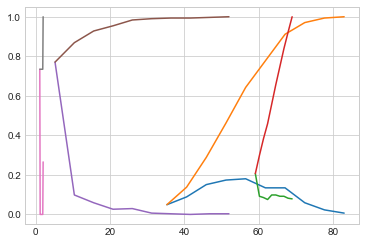

In [128]:
# Plots of CDF of Age.
counts, bin_edges = np.histogram(hbm['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Operation year
counts, bin_edges = np.histogram(hbm['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#axillary_lymph_node
counts, bin_edges = np.histogram(hbm['axillary_lymph_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#axillary_lymph_node
counts, bin_edges = np.histogram(hbm['survival_status'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

In [129]:
print("Means:")
print(np.mean(hbm["age"]))
#Mean with an outlier.
print(np.mean(np.append(hbm["age"],50)));
print(np.mean(hbm["operation_year"]))
print(np.mean(hbm["axillary_lymph_node"]))
print(np.mean(hbm["survival_status"]))

print("\nStd-dev:");
print(np.std(hbm["age"]))
print(np.std(hbm["operation_year"]))
print(np.std(hbm["axillary_lymph_node"]))
print(np.std(hbm["survival_status"]))

Means:
52.5311475409836
52.52287581699346
62.84918032786885
4.036065573770492
1.2655737704918033

Std-dev:
10.726396748570311
3.2487386178063162
7.187558302814359
0.4416382489306951


# Median, Percentile, Quantile, IQR, MAD:
    

In [132]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hbm["age"]))
#Median with an outlier
print(np.median(np.append(hbm["age"],50)));
print(np.median(hbm["operation_year"]))
print(np.median(hbm["axillary_lymph_node"]))
print(np.median(hbm["survival_status"]))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hbm["age"]))
print(robust.mad(hbm["operation_year"]))
print(robust.mad(hbm["axillary_lymph_node"]))
print(robust.mad(hbm["survival_status"]))


print("\nQuantiles:")
print(np.percentile(hbm["age"],np.arange(0, 100, 25)))
print(np.percentile(hbm["operation_year"],np.arange(0, 100, 25)))
print(np.percentile(hbm["axillary_lymph_node"], np.arange(0, 100, 25)))
print(np.percentile(hbm["survival_status"], np.arange(0, 100, 25)))
print("\n90th Percentiles:")

print(np.percentile(hbm["age"],90))
print(np.percentile(hbm["operation_year"],90))
print(np.percentile(hbm["axillary_lymph_node"], 90))
print(np.percentile(hbm["survival_status"], 90))




Medians:
52.0
52.0
63.0
1.0
1.0

Median Absolute Deviation
11.860817748044816
4.447806655516806
1.482602218505602
0.0

Quantiles:
[30. 44. 52. 61.]
[58. 60. 63. 66.]
[0. 0. 1. 4.]
[1. 1. 1. 2.]

90th Percentiles:
67.0
67.0
13.0
2.0


# Box plot and Whiskers: 

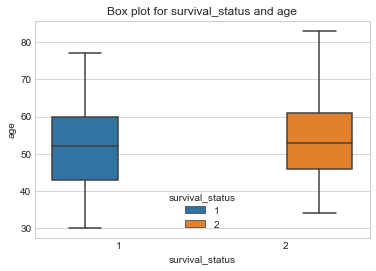

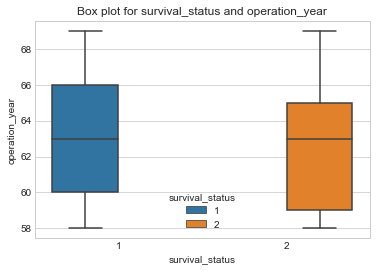

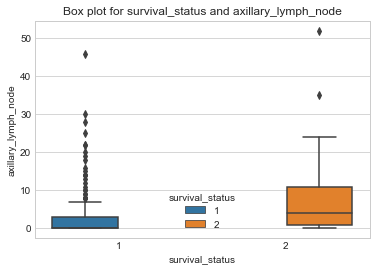

In [136]:
# boxplot gives you the statistical summery of data
# Rectangle represent the 2nd and 3rd quartile (horizontal line either side of the rectangle)
# The horizontal line inside box represents median
# We can add title in box plot using either way
# plt.title("Box plot for survival_status and age") or set_title("")


sns.boxplot(x = "survival_status", y = "age", hue = "survival_status", data = hbm).set_title("Box plot for survival_status and age")
plt.show()


sns.boxplot(x = "survival_status", y = "operation_year", hue = "survival_status", data = hbm).set_title("Box plot for survival_status and operation_year")
plt.show()


sns.boxplot(x = "survival_status", y = "axillary_lymph_node", hue = "survival_status", data = hbm).set_title("Box plot for survival_status and axillary_lymph_node")
plt.show()

# Violin plots :
    

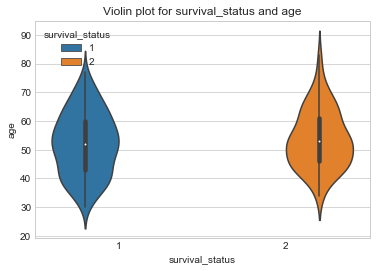

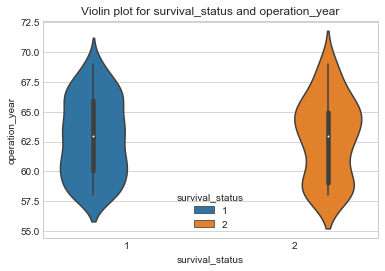

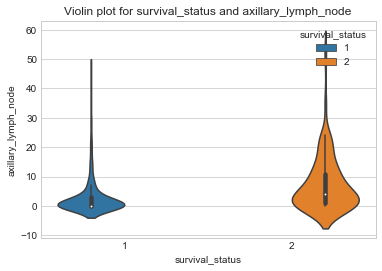

In [137]:
# The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median

sns.violinplot(x = "survival_status", y = "age", hue = "survival_status", data = hbm)
plt.title("Violin plot for survival_status and age")
plt.show()


sns.violinplot(x = "survival_status", y = "operation_year", hue = "survival_status", data = hbm)
plt.title("Violin plot for survival_status and operation_year")
plt.show()


sns.violinplot(x = "survival_status", y = "axillary_lymph_node", hue = "survival_status", data = hbm)
plt.title("Violin plot for survival_status and axillary_lymph_node")
plt.show()

# Multivariate probability density, contour plot:
    

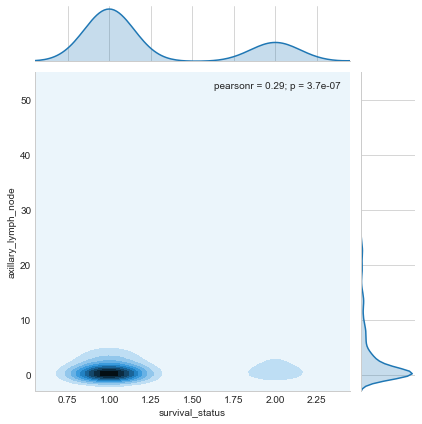

In [139]:
#2D Density plot, contors-plot
sns.jointplot(x="survival_status", y="axillary_lymph_node", data=hbm, kind="kde");
plt.show();

# Conclusion:

#### The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
#### The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.
#### somehow axillary_lymph_node is giving some intution in the dataset.
#### we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.
#### By plotting all pdf, cdf, box-plot, pair plots, scatter plot etc. we get only one conclusion :
#### if number of axillary node is less,than survival of patients is more
#### We need more features to comes on very good conlusion.